In [1]:
# import libraries
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# load iris data from datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# data exploration
print("Feature names: ", iris.feature_names)
print("Target name: ", iris.target_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target name:  ['setosa' 'versicolor' 'virginica']


In [7]:
# proportion of setosa
IsSetosa = (iris.target == 0)
print("Portion of Setosa: ", IsSetosa.sum()/len(IsSetosa))

Portion of Setosa:  0.3333333333333333


In [9]:
# convert loaded iris data into dataframe
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['label'] = IsSetosa
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


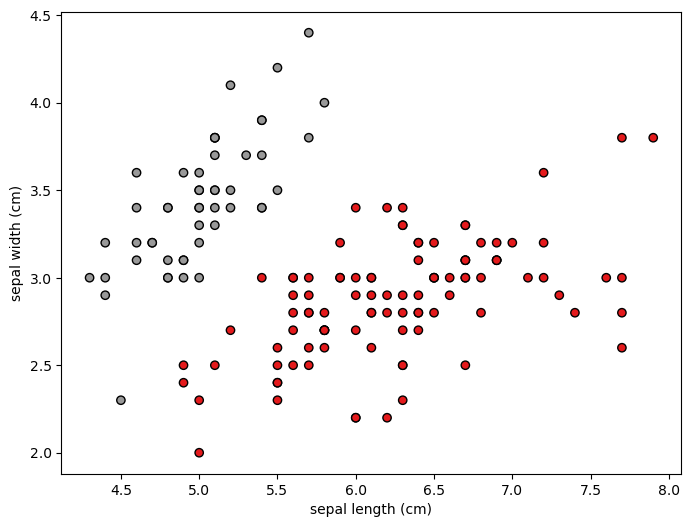

In [11]:
# data visualization
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=IsSetosa, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [13]:
# check for null values
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
label                False
dtype: bool

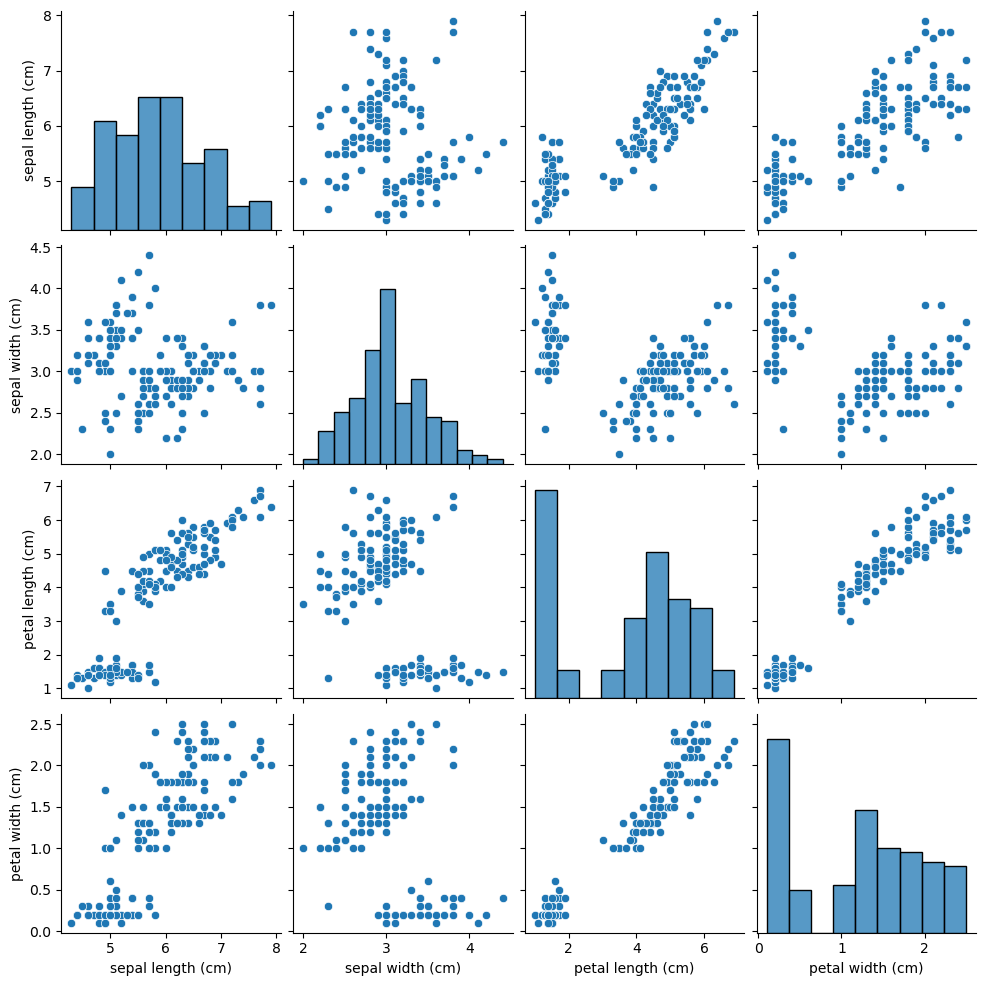

In [15]:
# plot pairwise scatterplot
sns.pairplot(df.iloc[:, :-1])
plt.show()

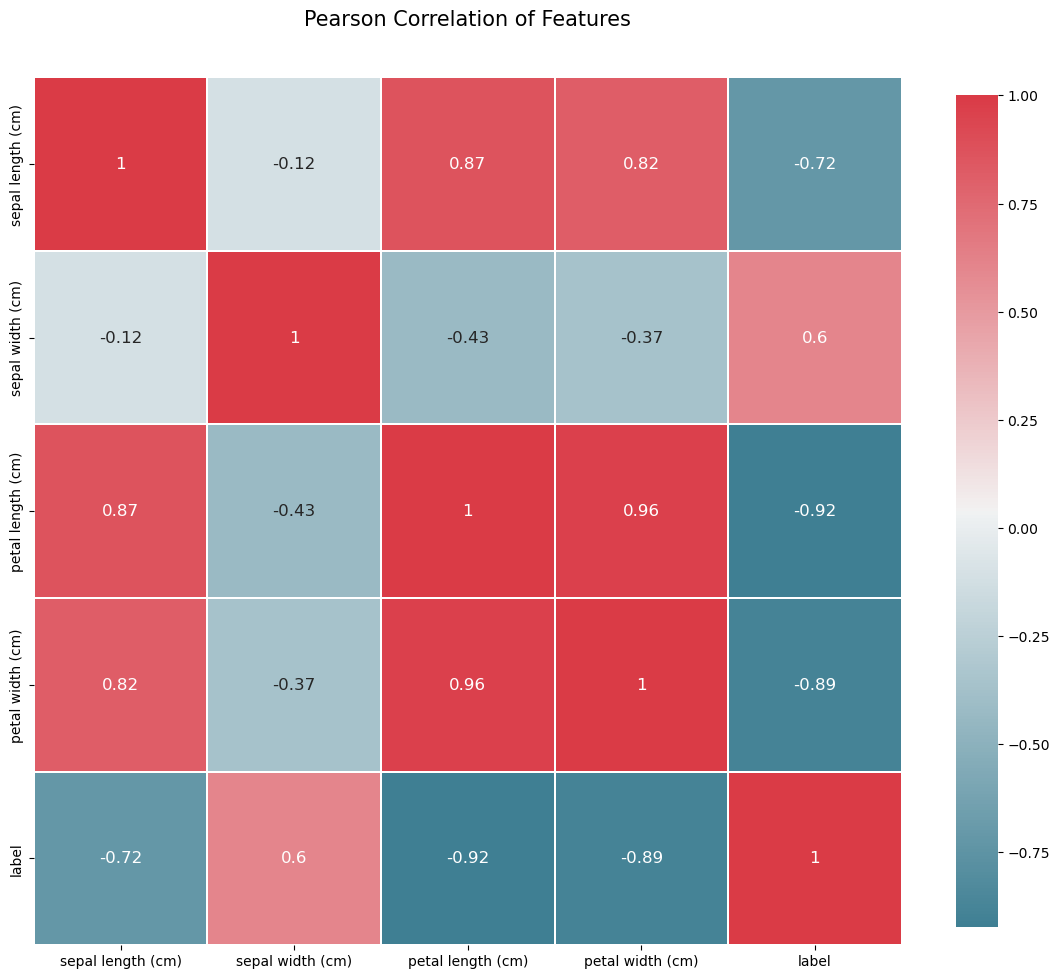

In [19]:
# plot heatmap
def correlation_heatmap(data):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(
        data.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink':.9},
        ax = ax, 
        annot = True,
        linewidths = 0.1, vmax = 1.0, linecolor = 'white',
        annot_kws = {'fontsize': 12}
    )
    plt.title('Pearson Correlation of Features', y = 1.05, size = 15)
    plt.show()

correlation_heatmap(df)

In [21]:
# split data into training and test set
train, test = train_test_split(df, test_size = 0.1, random_state = 0)
print('Size of train dataset: ', train.shape)
print('Size of test dataset: ', test.shape)

Size of train dataset:  (135, 5)
Size of test dataset:  (15, 5)


In [23]:
# define variables
# let x in the training set be the variables without label
# let y in the training set be the label
x_train = train.iloc[:, :-1]
y_train = train['label']
# let x in the test set be the variables without label
# let y in the test set be the label
x_test = test.iloc[:, :-1]
y_test = test['label']

In [25]:
# fit logistic regression using training dataset
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1)
# C is an inverse regularization parameter controlling overfitting
# a smaller C specifies stronger regularization
logreg.fit(x_train.iloc[:, 0:2], y_train)

LogisticRegression(C=1)

Generated points:  [4.         4.33333333 4.66666667 5.         5.33333333 5.66666667
 6.         6.33333333 6.66666667 7.        ]
Estimated decision boundary:  [1.66104249 2.01530291 2.36956334 2.72382376 3.07808419 3.43234462
 3.78660504 4.14086547 4.49512589 4.84938632]


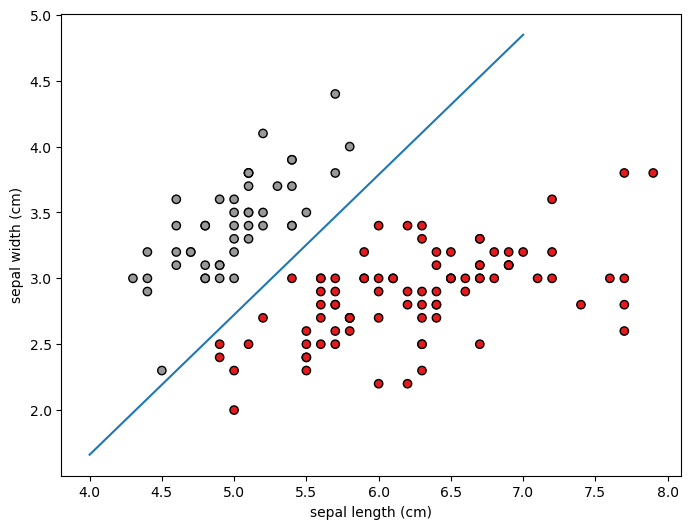

In [29]:
# visualize decision boundary
# plot training data and decision boundary
plt.figure(figsize=(8,6))
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c = y_train, cmap = plt.cm.Set1, edgecolor = 'k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Xii = np.linspace(4,7,10)
print("Generated points: ", Xii)
Yii = (-logreg.coef_[0][0]*Xii-logreg.intercept_)/logreg.coef_[0][1]
print("Estimated decision boundary: ", Yii)
plt.plot(Xii, Yii)
plt.show()

Generated points:  [4.         4.33333333 4.66666667 5.         5.33333333 5.66666667
 6.         6.33333333 6.66666667 7.        ]
Estimated decision boundary:  [1.66104249 2.01530291 2.36956334 2.72382376 3.07808419 3.43234462
 3.78660504 4.14086547 4.49512589 4.84938632]


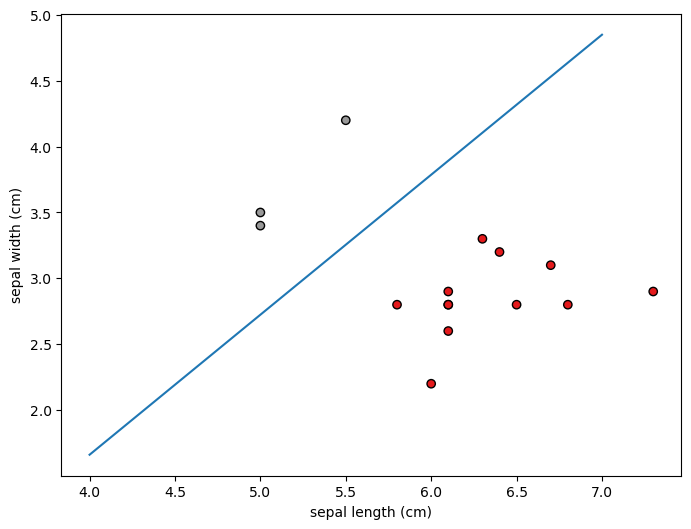

In [31]:
# visualize performance of trained model on test dataset
# plot test data and decision boundary
plt.figure(figsize=(8,6))
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test, cmap = plt.cm.Set1, edgecolor = 'k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Xii = np.linspace(4,7,10)
print("Generated points: ", Xii)
Yii = (-logreg.coef_[0][0]*Xii-logreg.intercept_)/logreg.coef_[0][1]
print("Estimated decision boundary: ", Yii)
plt.plot(Xii, Yii)
plt.show()

In [33]:
# model coefficients
print("Model coefficients: ")
print("w_0 = ", logreg.intercept_[0], "; w_1 = ", logreg.coef_[0][0], "; w_2 = ", logreg.coef_[0][1])

Model coefficients: 
w_0 =  8.023444303701037 ; w_1 =  -3.2922372137273914 ; w_2 =  3.097756130167221


In [35]:
# predict iris classes based on petal width and length
y_pred = logreg.predict(x_test.iloc[:, 0:2])
compare = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
compare

,Predicted,Actual
114,False,False
62,False,False
33,True,True
107,False,False
7,True,True
100,False,False
40,True,True
86,False,False
76,False,False
71,False,False


In [37]:
# to evaluate a classification problem, use accuracy_score to calculate accuracy of binary classification
from sklearn.metrics import accuracy_score
print("Prediction Accuracy: ", accuracy_score(y_test, y_pred))

Prediction Accuracy:  1.0
